In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Gauss Siedel Verification
A comparison of the Gallo Gauss Seidel solver with the analytic solution to the two group diffusion equations. 

### Problem Set Up 
(Taken from nptel.ac.in/courses/112101007/downloads/Lecturenotes/Lecture15.pdf)  
Assuming steady state, no fission, and no upscattering, the two group diffusion equations take the following form:
$$ D_1\nabla^2 \phi_1 - \Sigma_{a, 1} \phi_1 + s_1^{'''} - \Sigma_{s, 1 \rightarrow 2} \phi_1 = 0$$
$$ D_2\nabla^2 \phi_2 - \Sigma_{a, 2} \phi_2 + s_2^{'''} + \Sigma_{s, 1 \rightarrow 2} \phi_1 = 0$$
With uniform source and negligible scattering in the first group, we get
$$\nabla^2 \phi_1 - \frac{1}{\tau} \phi_1 = \frac{1}{D}s_1^{'''}$$

where $ \tau = \frac{D_1}{\Sigma_{s, 1 \rightarrow 2}}$. Note how similar this form is to the one group, uniform diffusion equation. It gives a similar solution on the domain $-1 \leq x \leq 1$:

$$\phi_1 = \left(1 - \frac{cosh(x/\sqrt{\tau})}{cosh(1/\sqrt{\tau})}\right) \frac{s_1^{'''}}{\Sigma_{a, 1}} $$

Rewrite equation 2 as:

$$ \nabla^2\phi_2 - \frac{1}{L^2}\phi_2 = -\frac{\Sigma_{s, 1\rightarrow 2}}{D_2}\phi_1 $$

where $L^2 = \frac{D_2}{\Sigma_{a, 2}}$. 

Plugging $\phi_1$ in to equation 2 gives 

$$ \nabla^2\phi_2 - \frac{1}{L^2}\phi_2 = -\frac{\Sigma_{s, 1\rightarrow 2}}{D_2}\left(1 - \frac{cosh(x/\sqrt{\tau})}{cosh(1/\sqrt{\tau})}\right) \frac{s_1^{'''}}{\Sigma_{a, 1}} $$

Which we we rewrite as 

$$ \nabla^2\phi_2 - \frac{\phi_2}{L^2} = C_1 - C_2 cosh(\frac{x}{C_3})$$

where $ C_1 = -\frac{s_1^{'''}\Sigma_{s, 1\rightarrow 2} }{D_2\Sigma_{a, 1}} $ , $C_2 = -\frac{s_1^{'''}\Sigma_{s, 1\rightarrow 2} }{D_2\Sigma_{a, 1}cosh(1/\sqrt{\tau})}$ and $C_3 = \sqrt{\tau}$.

Wolfram Alpha gives the solution as:

$$\phi_2 = -\frac{C_1C_3^2L^2}{(C_3 - L)(C_3+L)} + \frac{C_1L^4}{(C_3 - L)(C_3 + L)} + \frac{(C_3^2C_2L^2cosh(\frac{x}{C_3})}{(C_3 - L)(C_3 + L)} + C_4e^{-x/L} + C_5e^{x/L}$$

Using the following boundary conditions:
$$lim_{x\rightarrow 1} \phi_2 = 0 $$
$$lim_{x\rightarrow -1} \phi_2 = 0 $$

This allows us to write a system of equations:

$$0 = E + C_4e^{-1/L} + C_5e^{1/L}$$
$$0 = E + C_4e^{1/L} + C_5e^{-1/L}$$


where $E = A + B + Dcosh(1/C_3) = A + B + Dcosh(-1/C_3)$, since $cosh(x)$ is an even function, and $A = -\frac{C_1C_3^2L^2}{(C_3 - L)(C_3+L)}$, $B = \frac{C_1L^4}{(C_3 - L)(C_3 + L)}$ and $D = \frac{(C_3^2C_2L^2}{(C_3 - L)(C_3 + L)}$

$$C_5 = \frac{E(1-e^{2/L})}{e^{3/L}+e^{-1/L}} $$
$$C_4 = \frac{-E(e^{2/L} - 1)}{e^{3/L} - e^{-1/L}}$$

In [23]:
source = 10
absorption = np.array([10, 10])
scattering = np.array([[1, 1], [0, 1]])
total = np.array([12, 11])
diffusion = 1/(3*total)
tau = diffusion[0]/scattering[0, 1]

In [24]:
x = np.arange(-1, 1, .01)
phi_1 = (1 - np.cosh(x/np.sqrt(tau))/np.cosh(1/np.sqrt(tau)))*source/absorption[0]

In [25]:
C1 = -source*scattering[0, 1]/(diffusion[1]*absorption[0])
C2 = -source*scattering[0, 1]/(diffusion[1]*absorption[0]*np.cosh(1/np.sqrt(tau)))
C3 = np.sqrt(tau)
L = np.sqrt(diffusion[1]/absorption[1])
A = -(C1*C3**2*L**2)/((C3 - L)*(C3 + L))
B = (C1*L**4)/((C3 - L)*(C3 + L))
D = (C3**2*C2*L**2)/((C3 - L)*(C3 + L))
E = A + B + D*np.cosh(1/C3)
C4 = -E*(np.exp(2/L) - 1)/(np.exp(3/L) - np.exp(-1/L))
C5 = E*(1 - np.exp(2/L))/(np.exp(3/L) - np.exp(-1/L))
phi_2 = A + B + D*np.cosh(x/C3) + C4*np.exp(-x/L) + C5*np.exp(x/L)

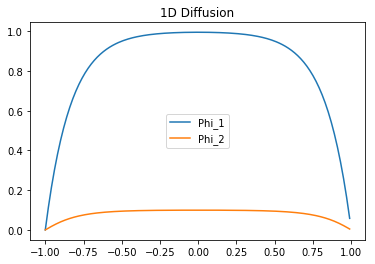

In [26]:
plt.plot(x, phi_1, label="Phi_1")
plt.plot(x, phi_2, label="Phi_2")
plt.title("1D Diffusion")
plt.legend()